In [1]:
# ======================== Les actions =================================================================
# Drop 2007 et 2008
# Drop Temp9am car c'est la même donnée que TempMin et Temp3pm qui est le même que TempMax
# Drop Uluru et Alice Springs car trop de nan
# Pour les nan restants on a récupéré les villes "radar" du point de vue météo, et on recopie les données manquantes des villes par rapport aux villes radar (à priori il y fait le même temps)
# Transformer la date en jour mois année
# Ajouter la notion de ville radar pour compléter les données manquantes dans un DF
# Faire un DF pour chaque ville / année et y stocker les moyennes des variables afin de remplir les derniers nan par ces valeurs
# Cloud9am et Cloud3pm liés sur les informations manquantes ==> je propose de dropper Cloud9am
# WindGustDir vent dominant on garde cela et on enlève WindDir9am WindDir3pm
# Idem pour WindGustSpeed
# ======================================================================================================
# 49 villes mais certaines ont très peu de données. Adelaide n'a aucune Sunshine


In [22]:
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
#===== Importation du fichier d'origine, je l'appelle full_data
full_data = pd.read_csv('weatherAUS.csv')
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [24]:
full_data.duplicated().sum()

0

In [77]:
#Je récupère les données radar
villesref=pd.read_csv("VilleRef.csv",sep=";")

In [8]:
villesref

,Ville,Radar
0,Adelaide,Nuriootpa
1,Albany,Perth
2,Albury,SydneyAirport
3,AliceSprings,Darwin
4,BadgerysCreek,SydneyAirport
5,Ballarat,MelbourneAirport
6,Bendigo,MelbourneAirport
7,Brisbane,isole
8,Cairns,isole
9,Canberra,SydneyAirport


In [78]:
dict_villes={}
for idx_ville,ligne in villesref.iterrows():
    dict_villes[ligne['Ville']] = ligne['Radar']
#dict_villes

In [125]:
def get_radar(df_1, villesref):
    
    ''' this function read two dataframe:
        1)  df_1 contain a column called Location
        2)  df_2 contain a column called Ville
        if the location are equals to the villes, 
        this function extract from the dictionary
        called dict_villes the radar element and put it 
        into a list radar.
        Eventually, the list is added as column at 
        df_1
        IMPORTANT before to use this function you shoul to
        import the villesref DataFrame as follow:
        villesref=pd.read_csv("VilleRef2.csv",sep=";")        
    '''

    dict_villes={}
    for idx_ville,ligne in villesref.iterrows():
        dict_villes[ligne['Ville']] = ligne['Radar']
    
    radar = []
    for city_1 in df_1.Location:
        for city_2 in villesref.Ville:
            if city_1 == city_2:
                radar.append(dict_villes.get(city_2))
                
    df_1['Radar'] = radar

#Exemple appel get_radar(df,villesref)


In [79]:
# Je transforme la date en jour mois année car j'en ai besoin mais ce  traitement sera fait par Bernadino car il a besoin aussi de ces informations pour faire les graphes
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data['year'] = full_data['Date'].dt.year
full_data['month'] = full_data['Date'].dt.month
full_data['day'] = full_data['Date'].dt.day

In [80]:
#Je droppe les villes où il y a trop peu de données
full_data.drop(full_data[full_data['Location'] == 'Katherine'].index, inplace = True, axis=0)
full_data.drop(full_data[full_data['Location'] == 'Launceston'].index, inplace = True, axis=0)

In [81]:
#2007 et 2008 sont quasi vides on supprime
full_data.drop(full_data[full_data['year'] == 2007].index, inplace = True, axis=0)
full_data.drop(full_data[full_data['year'] == 2008].index, inplace = True, axis=0)

In [82]:
full_data = full_data.dropna(subset=['RainToday'],axis=0)
full_data = full_data.dropna(subset=['RainTomorrow'],axis=0)

In [83]:
full_data.shape

(133963, 26)

In [84]:
TAILLE=full_data.shape[0]

In [85]:
full_data=full_data.drop('Temp9am',axis=1)
full_data=full_data.drop('Temp3pm',axis=1)
full_data=full_data.drop('WindDir9am',axis=1)
full_data=full_data.drop('WindDir3pm',axis=1)
full_data=full_data.drop('WindSpeed9am',axis=1)
full_data=full_data.drop('WindSpeed3pm',axis=1)
full_data=full_data.drop('Cloud9am',axis=1)
full_data=full_data.drop('Cloud3pm',axis=1)

In [33]:
villes=full_data['Location'].unique()
for ville in villes:
    print (ville," ", full_data[full_data['Location']==ville]['MaxTemp'].mode()[0])

Albury   14.9
BadgerysCreek   19.0
Cobar   17.0
CoffsHarbour   25.0
Moree   33.7
Newcastle   20.0
NorahHead   23.9
NorfolkIsland   20.3
Penrith   20.0
Richmond   19.8
Sydney   22.9
SydneyAirport   21.7
WaggaWagga   14.6
Williamtown   19.8
Wollongong   19.3
Canberra   15.2
Tuggeranong   16.0
MountGinini   13.0
Ballarat   12.4
Bendigo   14.1
Sale   14.8
MelbourneAirport   15.0
Melbourne   16.1
Mildura   17.9
Nhil   14.9
Portland   14.8
Watsonia   14.6
Dartmoor   14.4
Brisbane   28.4
Cairns   31.0
GoldCoast   28.4
Townsville   29.1
Adelaide   16.2
MountGambier   14.6
Nuriootpa   14.5
Woomera   18.0
Albany   19.0
Witchcliffe   18.9
PearceRAAF   19.5
PerthAirport   20.2
Perth   19.8
SalmonGums   18.9
Walpole   20.3
Hobart   14.8
AliceSprings   23.2
Darwin   33.3
Uluru   39.1


In [1002]:
# ======================================================================= Les fonctions utiles

In [86]:
#Fonction qui cherche le mode d'une variable car données insuffisantes pour la ville et pas de données non plus dans la ville radar
def FindValByMode(ville,variable,year,month):
    cond=((full_data['Location']==ville) & (full_data['year']==year) & (full_data['month']==month))
    x=full_data[cond][variable].index
    if (x.empty):
        return np.nan
    else:
        y=full_data[cond][variable].mode()
        if (y.empty):
            return np.nan
        else:
            return full_data[cond][variable].mode()[0]

In [87]:
# Fonction utilisée à la fin pour mettre à jour les derniers nan par le tableau  des moyennes
def MajVariableParTblMoy(tblval,variable):
    for indx,ville in tblval.iterrows():
        cond=((tbl_moy['Location']==ville['Location']) & (tbl_moy['year']==ville['year']) & (tbl_moy['month']==ville['month']))
        val_moyenne=tbl_moy[cond][variable].to_numpy()
        full_data.loc[indx,variable]=val_moyenne[0]

In [88]:
# Fonction qui met à jour le tableau des moyennes mensuelles, ce tableau sert à la fin à combler les derniers nan des villes
def Maj_TblMoy(tab_moy,variable):
    for index_val, row in tab_moy.iterrows():
        ville_ref = dict_villes[row['Location']]
        if ville_ref =='isole':
            cond=(full_data['Location']==row['Location'])
        else:
            cond=(full_data['Location']==ville_ref)
        y=full_data[cond & (full_data['year']==row['year'])][variable].mode()
        if (y.empty):
            Mode_An=full_data[cond][variable].mode()[0]
        else:
            Mode_An=y[0]
        tbl_moy.loc[index_val,variable]=Mode_An

In [89]:
# Récupère dans un DF toutes les lignes qui ont des valeurs Nan pour la variable passée en paramètre
def VisionNull(variable):
    df2 = full_data[full_data[variable].isnull()][['Location','year','month','day']]
    return df2.sort_values(by=['Location','year','month','day'])

In [90]:
#Pour les valeurs nulles importantes on traite par paquet, cette fonction appelle la fonction qui met à jour les données par jour/mois/année en fonction de la ville de réference ou par le mode si données incomplètes
#V2
def TraitePaquets(tab_var,variable):
    i=0      
    for indx,ville in tab_var.iterrows():
        V1=ville['Location']
        V2=dict_villes[V1]
        if V2=='isole':
            retour=FindValByMode(V1,variable,ville['year'],ville['month'])
        else:
            retour=FindValVilleRef(V2,variable,ville['year'],ville['month'],ville['day'])
            if pd.isnull(retour): 
                retour=FindValByMode(V2,variable,ville['year'],ville['month'])
         
        full_data.loc[indx,variable]=retour
        i+=1
    return "Fin", i, 'lignes traitées'

In [91]:
# Fonction qui cherche la valeur de la variable passée en paramètre pour l'année/le mois/le jour
#V2
def FindValVilleRef(ville,variable,year,month,day):
    cond=((full_data['Location']==ville) & (full_data['year']==year) & (full_data['month']==month) & (full_data['day']==day))
    x=full_data[cond][variable].index
    if x.empty:
        return np.nan
    else:
    #index compris entre (x>=0) & (x <= TAILLE):
        return full_data[cond][variable].to_numpy()[0]

In [19]:
def TraiteWindGustDirFinal(tab_var,variable):
    i=0      
    for indx,ville in tab_var.iterrows():
        V1=ville['Location']
        V2=dict_villes[V1]
        full_data.loc[indx,variable]=FindValByMode(V1,variable,ville['year'],ville['month'])
        i+=1
    return "Fin", i, 'lignes traitées'

In [92]:
tbl_val=VisionNull('Sunshine')
TraitePaquets(tbl_val,'Sunshine')

('Fin', 61958, 'lignes traitées')

In [102]:
tbl_val=VisionNull('Evaporation')
TraitePaquets(tbl_val,'Evaporation')

('Fin', 56442, 'lignes traitées')

In [93]:
tbl_val=VisionNull('Pressure9am')
TraitePaquets(tbl_val,'Pressure9am')

('Fin', 12506, 'lignes traitées')

In [101]:
tbl_val=VisionNull('Pressure3pm')
TraitePaquets(tbl_val,'Pressure3pm')

('Fin', 12529, 'lignes traitées')

In [94]:
tbl_val=VisionNull('MinTemp')
TraitePaquets(tbl_val,'MinTemp')

('Fin', 431, 'lignes traitées')

In [95]:
tbl_val=VisionNull('MaxTemp')
TraitePaquets(tbl_val,'MaxTemp')

('Fin', 279, 'lignes traitées')

In [96]:
tbl_val=VisionNull('Rainfall')
TraitePaquets(tbl_val,'Rainfall')

('Fin', 0, 'lignes traitées')

In [97]:
tbl_val=VisionNull('Humidity9am')
TraitePaquets(tbl_val,'Humidity9am')

('Fin', 1428, 'lignes traitées')

In [98]:
tbl_val=VisionNull('Humidity3pm')
TraitePaquets(tbl_val,'Humidity3pm')

('Fin', 2661, 'lignes traitées')

In [99]:
tbl_val=VisionNull('WindGustSpeed')
TraitePaquets(tbl_val,'WindGustSpeed')

('Fin', 8604, 'lignes traitées')

In [100]:
tbl_val=VisionNull('WindGustDir')
TraitePaquets(tbl_val,'WindGustDir')


('Fin', 8660, 'lignes traitées')

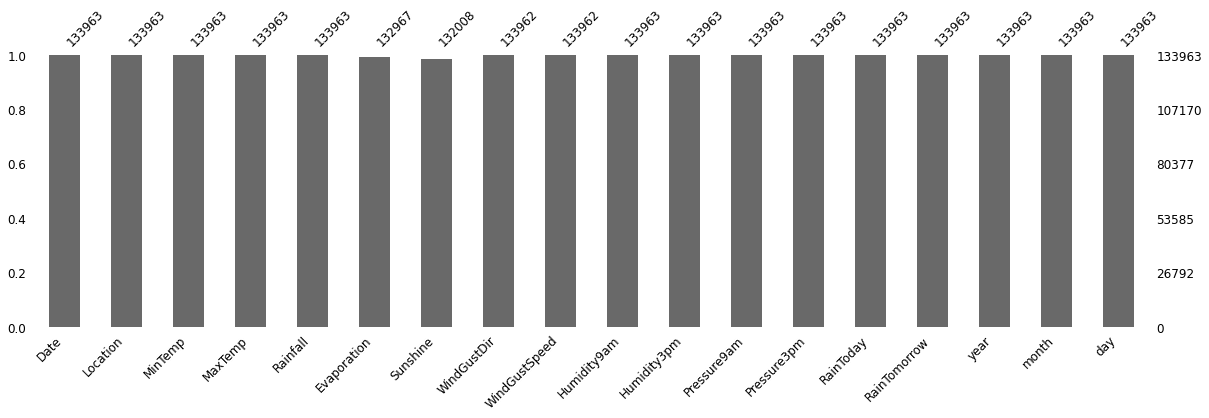

In [103]:
msno.bar(full_data, figsize=(20,5), fontsize=12);

In [105]:
# Je construis le tableau des moyennes mensuelles pour chaque ville / année / mois afin de combler les derniers nan de full_data
tbl_moy=full_data.groupby(['Location','year','month'],as_index=False).mean()
tbl_moy.shape

(4540, 14)

In [106]:
tbl_moy.isnull().sum()

Location          0
year              0
month             0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation      34
Sunshine         63
WindGustSpeed     0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
day               0
dtype: int64

In [113]:
tab_moy=tbl_moy[tbl_moy['Evaporation'].isnull()][['Location','year']]
tab_moy=tab_moy.sort_values(by=['Location','year'])
Maj_TblMoy(tbl_moy,'Evaporation')

In [114]:
tab_moy=tbl_moy[tbl_moy['Sunshine'].isnull()][['Location','year']]
tab_moy=tab_moy.sort_values(by=['Location','year'])
Maj_TblMoy(tbl_moy,'Sunshine')

In [115]:
tbl_moy.isnull().sum()

Location         0
year             0
month            0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
day              0
dtype: int64

In [116]:
full_data.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation       990
Sunshine         1789
WindGustDir         0
WindGustSpeed       1
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
RainToday           0
RainTomorrow        0
year                0
month               0
day                 0
dtype: int64

In [117]:
#Mise à jour des derniers nan par tblmoy
tbl_val=VisionNull('Evaporation')
MajVariableParTblMoy(tbl_val,'Evaporation')

In [118]:
#Mise à jour des derniers nan par tblmoy
tbl_val=VisionNull('Sunshine')
MajVariableParTblMoy(tbl_val,'Sunshine')

In [119]:
#Traitement derniers nan
tbl_val=VisionNull('WindGustDir')
TraiteWindGustDirFinal(tbl_val,'WindGustDir')

('Fin', 0, 'lignes traitées')

In [121]:
tbl_val=VisionNull('WindGustSpeed')
TraiteWindGustDirFinal(tbl_val,'WindGustSpeed')

('Fin', 1, 'lignes traitées')

In [122]:
full_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

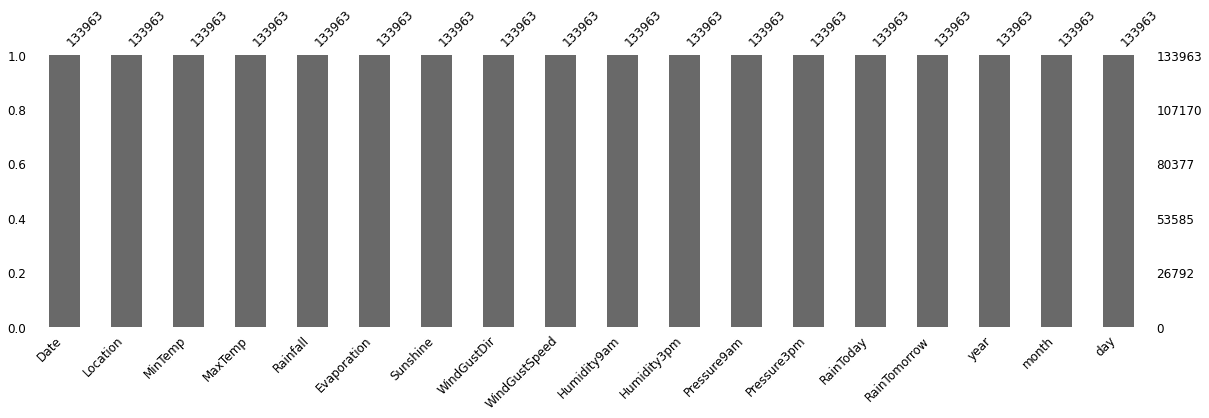

In [123]:
# Graphique Missingno pour évaluer les données manquantes après traitement
msno.bar(full_data, figsize=(20,5), fontsize=12);

In [999]:
#Export du fichier
full_data.to_csv('WeatherAUSFinal.csv',sep=';',index=False)

In [ ]:
#====== Ajouter région et radar dans le dataset =======================================

In [36]:
full_data=pd.read_csv("WeatherAUSFinal.csv",sep=";")

In [38]:
villesregion=pd.read_csv("VillesRegion.csv",sep=";")
villesregion

,Ville,Region
0,Adelaide,South Australia
1,MountGambier,South Australia
2,Nuriootpa,South Australia
3,Richmond,Tasmania
4,woomera,South Australia
5,Brisbane,Queensland
6,Cairns,Queensland
7,CoffsHarbour,New South Wales
8,GoldCoast,Queensland
9,Townsville,Queensland


In [40]:
villesradarregion=pd.merge(villesref, villesregion, left_on='Ville', right_on='Ville', how='inner') 


In [29]:
dict_regions={}
for idx_ville,ligne in villesregion.iterrows():
    dict_villes[ligne['Ville']] = ligne['Region']
    

In [41]:
new_data=pd.merge(full_data, villesradarregion, left_on='Location', right_on='Ville', how='inner') 
new_data=new_data.drop('Ville',axis=1)

In [42]:
new_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,...,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,Radar,Region
0,2009-01-01,Albury,11.3,26.5,0.0,9.8,12.9,WNW,56.0,46.0,...,1004.5,1003.2,No,No,2009,1,1,1,SydneyAirport,New South Wales
1,2009-01-02,Albury,9.6,23.9,0.0,11.0,5.9,W,41.0,44.0,...,1014.4,1013.1,No,No,2009,1,2,1,SydneyAirport,New South Wales
2,2009-01-03,Albury,10.5,28.8,0.0,9.0,0.5,SSE,26.0,43.0,...,1018.7,1014.8,No,No,2009,1,3,1,SydneyAirport,New South Wales
3,2009-01-04,Albury,12.3,34.6,0.0,5.4,11.3,WNW,37.0,41.0,...,1015.1,1010.3,No,No,2009,1,4,1,SydneyAirport,New South Wales
4,2009-01-05,Albury,12.9,35.8,0.0,10.0,12.2,WNW,41.0,41.0,...,1012.6,1009.2,No,No,2009,1,5,2,SydneyAirport,New South Wales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124843,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,63.0,...,1013.9,1010.5,No,No,2017,6,20,25,isole,Northern Territory
124844,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,56.0,...,1014.6,1011.2,No,No,2017,6,21,25,isole,Northern Territory
124845,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,46.0,...,1015.3,1011.8,No,No,2017,6,22,25,isole,Northern Territory
124846,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,62.0,...,1014.9,1010.7,No,No,2017,6,23,25,isole,Northern Territory


In [43]:
new_data.to_csv('WeatherAUSRadarRegion.csv',sep=';',index=False)

In [8]:
#Export par Region

In [ ]:
data_region_NSW = new_data[new_data['Region']=='New South Wales']
data_region_VIC = new_data[new_data['Region']=='Victoria']
data_region_WEA = new_data[new_data['Region']=='Western Australia']
data_region_SOA = new_data[new_data['Region']=='South Australia']
data_region_TAS=new_data[new_data['Region']=='Tasmania']
data_region_NIS = new_data[new_data['Location']=='NorfolkIsland']

In [ ]:
data_region_NSW.to_csv('WeatherAUSRegionNSW.csv',sep=';',index=False)
data_region_VIC.to_csv('WeatherAUSRegionVIC.csv',sep=';',index=False)
data_region_WEA.to_csv('WeatherAUSRegionWEA.csv',sep=';',index=False)
data_region_SOA.to_csv('WeatherAUSRegionSOA.csv',sep=';',index=False)
data_region_TAS.to_csv('WeatherAUSRegionTAS.csv',sep=';',index=False)
data_region_NIS.to_csv('WeatherAUSRegionNIS.csv',sep=';',index=False)